Título: Voronoi Binning

Data: 23/03/2020
    
Obj: Aplicar o algoritmo de Voronoi para aumentar a razão sinal/ruído em spaxes que possam ser aglotinados. Baseado no código de Michele Cappellari: The Voronoi binning method (VorBin) disponível em: https://www-astro.physics.ox.ac.uk/~mxc/software/#binning e descrito em https://ui.adsabs.harvard.edu/abs/2003MNRAS.342..345C

Autor: Carlos Roberto

In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt

import vorbin
from vorbin.voronoi_2d_binning import voronoi_2d_binning

data_folder = "/home/carlos/Desktop/pPXF(SDP)/"

Bin-accretion...
1  /  25
2  /  25
3  /  25
4  /  25
5  /  25
6  /  25
7  /  25
8  /  25
9  /  25
10  /  25
11  /  25
12  /  25
13  /  25
14  /  25
15  /  25
16  /  25
17  /  25
18  /  25
19  /  25
20  /  25
21  /  25
22  /  25
23  /  25
24  /  25
25  /  25
26  /  25
27  /  25
28  /  25
28  initial bins.
Reassign bad bins...
23  good bins.
Unbinned pixels:  0  /  270
Fractional S/N scatter (%): 18.595040763434778
Elapsed time accretion: 0.10 seconds
Elapsed time optimization: 0.00 seconds
22


/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


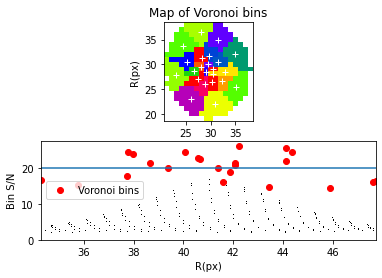

In [2]:
#y: é a posição y de onde foi extraído o sinal e o ruído
#x: é a posição x de onde foi extraído o sinal e o ruído
#signal: é o sinal do spaxel (y,x)
#noise: é o ruído do spaxel (y,x)

y, x, signal, noise = np.loadtxt("Full_Spec_GoodPixels.txt").T #Lê a saída do código SNR
targetSN = 20 #Threshold pretendido

    # Perform the actual computation. The vectors
    # (binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale)
    # are all generated in *output*
    #
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning(x, y, signal,
                                                                          noise, targetSN, plot=1, quiet=0,
                                                                         wvt=False,cvt=False)

    # Save to a text file the initial coordinates of each pixel together
    # with the corresponding bin number computed by this procedure.
    # binNum uniquely specifies the bins and for this reason it is the only
    # number required for any subsequent calculation on the bins.
    #
np.savetxt('Full_Spec_Voronoi_OutPut.txt', np.column_stack([y, x, binNum]),header="y_px \t x_px \t Vorbin_Id", fmt=b'%10.6f %10.6f %8i')
print(binNum.max())
plt.subplot(211)
plt.xlabel('R(px)')
plt.ylabel('R(px)')
plt.subplot(212)
plt.xlabel('R(px)')
plt.savefig(data_folder+'Data/Voronoi/Vorbin.png', format='png')

#Essas são as novas posições dos spaxels binnados

#print(xBar)
#print(yBar)

In [3]:
(xNode - 29)*0.2

array([ 0.        , -0.3       , -0.05      ,  0.26666667,  0.3       ,
        0.64      ,  0.35714286, -0.60666667, -1.19285714, -0.46666667,
       -0.2       ,  0.3       , -0.75555556,  0.1       ,  0.76      ,
        1.225     ,  0.5       , -0.13333333,  0.13333333,  1.17857143,
        0.50526316, -0.92142857, -0.18333333])

In [5]:
(yNode - 29)*0.2

array([-0.1       , -0.4       , -0.6       , -0.53333333, -0.2       ,
       -0.48      , -1.40714286, -1.22      , -0.22857143, -0.06666667,
        0.1       ,  0.        ,  0.31111111,  0.2       , -0.12      ,
       -0.70625   ,  0.3       ,  0.46666667,  0.53333333,  0.60714286,
        1.17894737,  0.95714286,  1.49166667])